# Random Forest Classifier - Label 2

Classification on Label 2 (copepod vs noncopepod vs detritus).

In [ ]:
# delete variables in memory
%reset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Load the data which have been processed in R

In [2]:
train = pd.read_csv("../../../data/processed/labelled-features/labelled-features-train.csv")
train = train.set_index('index')
train
test = pd.read_csv("../../../data/processed/labelled-features/labelled-features-test.csv")
test = test.set_index('index')

In [3]:
print(train["label2"].unique())

['noncopepod' 'copepod' 'detritus']


In [4]:
print(train.shape)
print(test.shape)

(51309, 39)
(5682, 39)


In [5]:
print( np.sum( train.label2.str.contains("detritus") ) )
print( np.sum( test.label2.str.contains("detritus") ) )

36000
4000


Remove unwanted columns

In [6]:
for col in train.columns:
    print(col)

filename
label1
label2
label3
object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity
img_file_name
img_rank


These are the columns we are retaining in the features matrix (X)

In [7]:
cols_retain = [ col for col in train.columns if col not in ['filename', 'label1', 'label2', 'label3',
                                                           'img_file_name', 'img_rank'] ]

In [8]:
for col in cols_retain:
    print(col)

object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity


Define train and test matrices. First encode labels

In [9]:
# Encode taget labels with value between 0 and n_classes-1
LE = LabelEncoder()
LE.fit( train['label2'] ) # fit label encoder
y_train = LE.transform( train['label2'] ) # transform labels to normalized encoding
y_test = LE.transform( test['label2'] ) # transform labels to normalized encoding

Just making sure that the above has worked

In [10]:
( np.sum(y_train == 2) ) == ( np.sum(train['label2'] == 'noncopepod') )

True

In [11]:
( np.sum(y_test == 2) ) == ( np.sum(test['label2'] == 'noncopepod') )

True

In [12]:
print(LE.classes_)

['copepod' 'detritus' 'noncopepod']


In [13]:
X_train = train[cols_retain]  # Features
X_test = test[cols_retain]  # Features

In [14]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) # this is the default number of trees in the forest

In [15]:
import time

tic = time.perf_counter()
clf.fit(X_train,y_train) # Train the model using the training sets
toc = time.perf_counter()

print("Time to train model: %.4f seconds" % (toc-tic))

Time to train model: 8.6194 seconds


In [16]:
#Make prediction using features in test set
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 2, ..., 0, 0, 2])

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.22140091517071453
Mean Squared Error: 0.3512847588877156
Root Mean Squared Error: 0.5926928031347399
Accuracy: 0.843541006687786


In [18]:
print(metrics.classification_report(y_test,y_pred, target_names=LE.classes_))

              precision    recall  f1-score   support

     copepod       0.67      0.79      0.73      1022
    detritus       0.93      0.94      0.94      4000
  noncopepod       0.51      0.37      0.43       660

    accuracy                           0.84      5682
   macro avg       0.71      0.70      0.70      5682
weighted avg       0.84      0.84      0.84      5682



In [19]:
precision, recall, f1_score, _ = metrics.precision_recall_fscore_support(
    y_test, y_pred,beta=1.0, average='macro')

print(precision)
print(recall)
print(f1_score)

0.7055554349358436
0.6974316155686019
0.6960654459844213


In [20]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

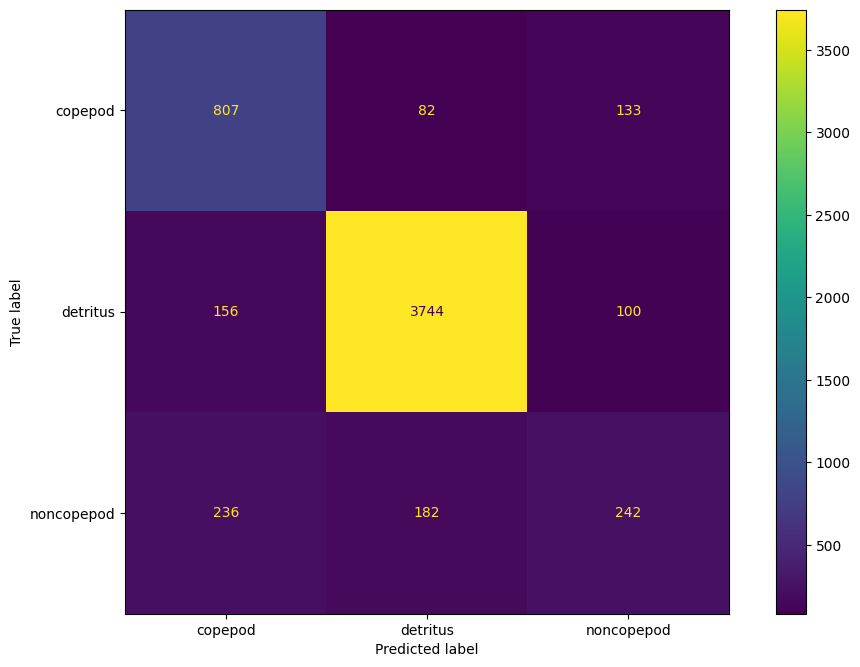

In [21]:
metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels = LE.classes_) 
plt.show()

Find important features for classification

In [22]:
feature_names = X_train.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)

object_intden                 0.103207
object_mean                   0.086745
object_range                  0.080020
object_max                    0.078604
object_min                    0.071894
object_x                      0.069274
object_minor                  0.067348
object_perimareaexc           0.058328
object_width                  0.056977
object_local_centroid_col     0.048556
object_equivalent_diameter    0.037293
object_bounding_box_area      0.035444
object_convex_area            0.032341
object_area                   0.027635
object_perim.                 0.026716
object_circex                 0.015932
object_circ.                  0.013585
object_area_exc               0.013317
object_elongation             0.012652
object_perimmajor             0.011392
object_eccentricity           0.011138
object_major                  0.010784
object_y                      0.010218
object_local_centroid_row     0.010003
object_height                 0.008515
object_angle             

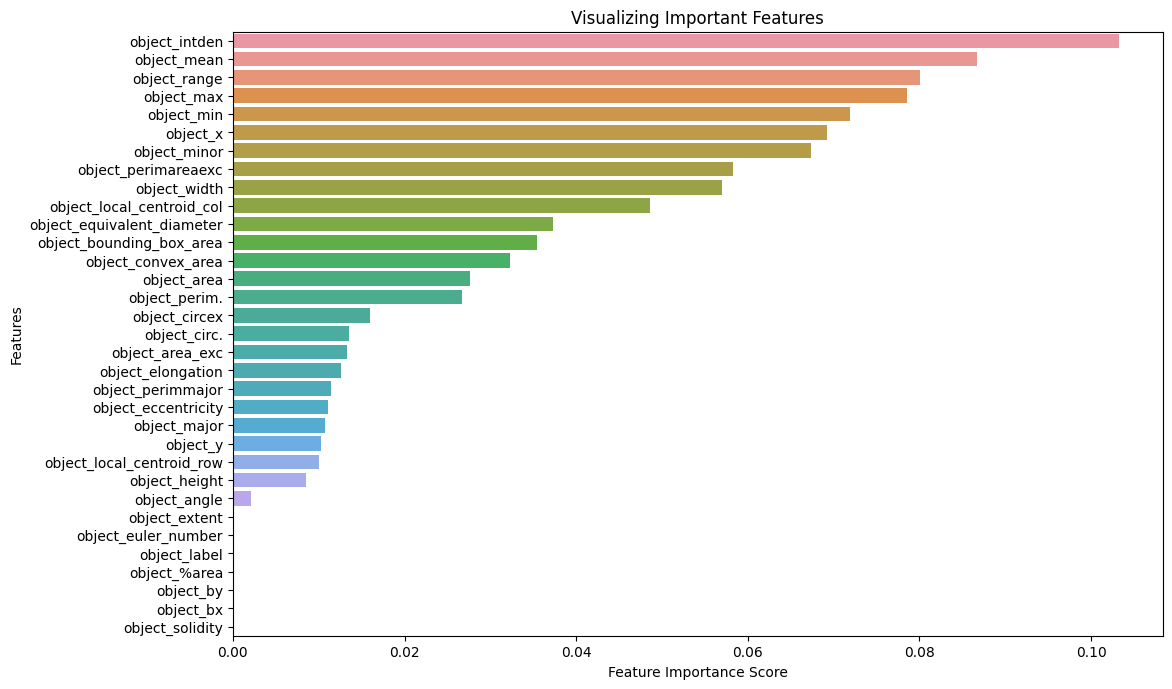

In [23]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

The following calculates precision, recall, accuracy and f1 using the pre-computed confusion matrix

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [25]:
from evaluate_model import model_metrics
accuracy, precision, recall, f1 = model_metrics(confusion_matrix)
print("precision = %.3f" % precision)
print("recall = %.3f" % recall)
print("accuracy = %.3f" % accuracy)
print("f1 = %.3f" % f1)

precision = 0.706
recall = 0.697
accuracy = 0.844
f1 = 0.696


Export pre-trained model as pkl file so that it can later be used in scivision

In [26]:
with open('/output/models/randomforest/rf-label2-with-detritus.pkl','wb') as f:
    pickle.dump(clf,f)